# Hate Speech Detector - Models Summary & Tests

In [1]:
import csv
import pickle
import os
import glob
import json

import numpy as np
import pandas as pd

from datetime import datetime, timedelta, date

from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

## Models summary

In [2]:
file_names = glob.glob('results/*/short_results.csv')
file_names

['results/pl_svm/short_results.csv',
 'results/pl_dense/short_results.csv',
 'results/en_dense/short_results.csv',
 'results/en_conv/short_results.csv',
 'results/pl_conv/short_results.csv',
 'results/pl_lstm/short_results.csv',
 'results/en_svm/short_results.csv',
 'results/en_lstm/short_results.csv']

In [3]:
order = [6, 2, 3, 7, 0, 1, 4, 5]
file_names = [file_names[i] for i in order]
file_names

['results/en_svm/short_results.csv',
 'results/en_dense/short_results.csv',
 'results/en_conv/short_results.csv',
 'results/en_lstm/short_results.csv',
 'results/pl_svm/short_results.csv',
 'results/pl_dense/short_results.csv',
 'results/pl_conv/short_results.csv',
 'results/pl_lstm/short_results.csv']

In [4]:
summary_data = []
for file_name in file_names:
    df = pd.read_csv(file_name)
    summary_data.append({'acc': np.mean(df['Accuracy']),
                         'f1s0': np.mean(df['F1 score (0)']),
                         'f1s1': np.mean(df['F1 score (1)'])})
summary_df = pd.DataFrame(summary_data)
summary_df

,acc,f1s0,f1s1
0,0.908003,0.776324,0.942093
1,0.946854,0.838069,0.968200
2,0.954584,0.868946,0.972532
3,0.956691,0.872398,0.973920
4,0.925747,0.955175,0.783831
5,0.931301,0.960522,0.735201
6,0.973891,0.984770,0.908545
7,0.981814,0.989327,0.938575


In [5]:
labels = ['SVM', 'Dense NN', 'Conv. NN', 'LSTM NN']

In [6]:
def models_comparison_bars(df, labels, title, save_file=None):
    
    def set_bar_labels(axis, bars):
        for bar in bars:
            h = bar.get_height()
            w = bar.get_width()
            x_c = bar.get_x()
            axis.annotate('{}'.format(round(h, 2)), xy=(x_c + w/2, h), xytext=(0, -20),
                          textcoords='offset points', size=15, ha='center', va='bottom')
    
    fig, axs = plt.subplots(1, 3, figsize=(16, 4))
    
    x = range(len(labels))
    acc = df['acc'].values
    f1s0 = df['f1s0'].values
    f1s1 = df['f1s1'].values
    
    max_acc_id = np.argmax(acc)
    max_f1s0_id = np.argmax(f1s0)
    max_f1s1_id = np.argmax(f1s1)
    
    bars0 = axs[0].bar(x, acc, color='r')
    axs[0].set_xlabel('Model')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_title('Accuracy')
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(labels)
    axs[0].set_ylim([0, 1])
    set_bar_labels(axs[0], bars0)
    axs[0].patches[max_acc_id].set_facecolor('g')
    
    bars1 = axs[1].bar(x, f1s0, color='b')
    axs[1].set_xlabel('Model')
    axs[1].set_ylabel('F1 score (no hate)')
    axs[1].set_title('F1 score (no hate)')
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(labels)
    axs[1].set_ylim([0, 1])
    set_bar_labels(axs[1], bars1)
    axs[1].patches[max_f1s0_id].set_facecolor('g')
    
    bars2 = axs[2].bar(x, f1s1, color='m')
    axs[2].set_xlabel('Model')
    axs[2].set_ylabel('F1 score (hate speech)')
    axs[2].set_title('F1 score (hate speech)')
    axs[2].set_xticks(x)
    axs[2].set_xticklabels(labels)
    axs[2].set_ylim([0, 1])
    set_bar_labels(axs[2], bars2)
    axs[2].patches[max_f1s1_id].set_facecolor('g')
    
    fig.suptitle(title)
    
    if save_file:
        plt.savefig(save_file)
    plt.show()

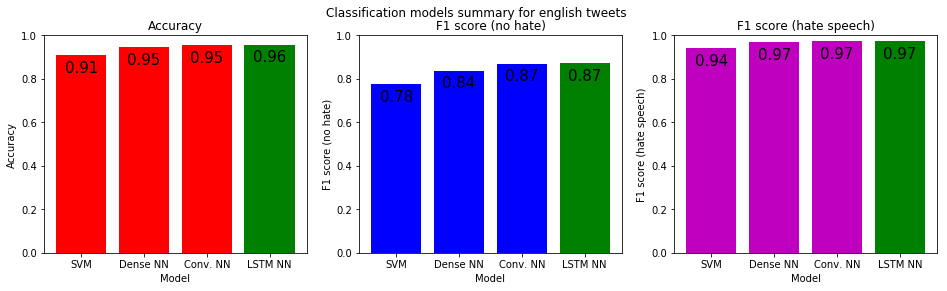

In [7]:
models_comparison_bars(summary_df.iloc[0:4], labels=labels,
                       title='Classification models summary for english tweets',
                       save_file='results/summary_en.png')

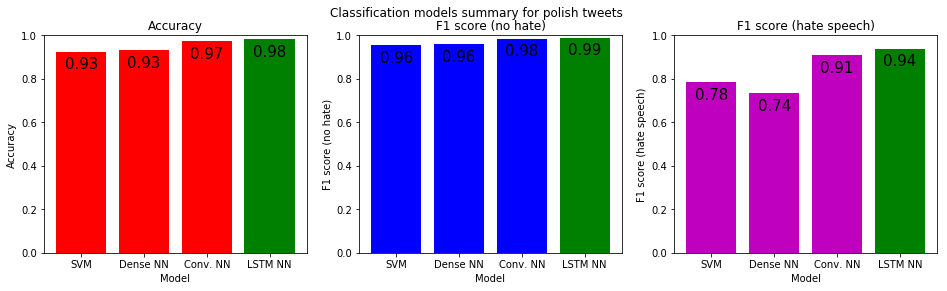

In [8]:
models_comparison_bars(summary_df.iloc[4:8], labels=labels,
                       title='Classification models summary for polish tweets',
                       save_file='results/summary_pl.png')

*The best classifier for english and polish tweets is LSTM Neural Network with 96% accuracy for EN and 98% for PL.*

## Tests summary

In [9]:
file_names_en = glob.glob('tests/en*/assigned_labels.csv')
order = [2, 0, 1, 3]
file_names_en = [file_names_en[i] for i in order]
file_names_en

['tests/en_svm/assigned_labels.csv',
 'tests/en_dense/assigned_labels.csv',
 'tests/en_conv/assigned_labels.csv',
 'tests/en_lstm/assigned_labels.csv']

In [10]:
file_names_pl = glob.glob('tests/pl*/assigned_labels.csv')
order = [0, 1, 2, 3]
file_names_pl = [file_names_pl[i] for i in order]
file_names_pl

['tests/pl_svm/assigned_labels.csv',
 'tests/pl_dense/assigned_labels.csv',
 'tests/pl_conv/assigned_labels.csv',
 'tests/pl_lstm/assigned_labels.csv']

In [11]:
def get_assignments_series(file_names):
    series = []
    for file_name in tqdm(file_names):
        with open(file_name, 'r') as f:
            reader = csv.reader(f)
            series.append([row[0] for row in list(reader)[1:]])
    
    return series

In [12]:
def class_distribution_hist(series, labels, cls, x_label, y_label, title, file_name=None):
    pd.Series(series).hist()
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    tick_marks = np.arange(len(cls))
    plt.xticks(tick_marks, cls)
    plt.legend(labels=labels, loc='best')
    
    if file_name:
        plt.savefig(file_name)
    plt.show()

In [13]:
series_en = get_assignments_series(file_names_en)
series_pl = get_assignments_series(file_names_pl)

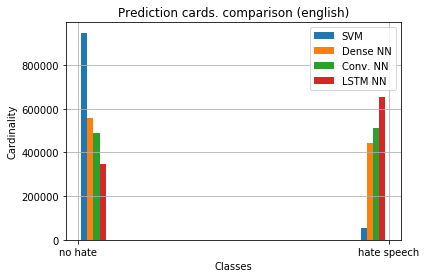

In [14]:
class_distribution_hist(series_en, labels=labels, cls=['no hate', 'hate speech'], x_label='Classes', y_label='Cardinality',
                        title='Prediction cards. comparison (english)', file_name='tests/pred_cards_comp_en.png')

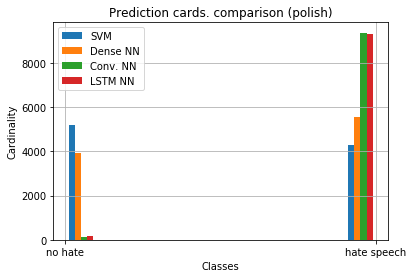

In [15]:
class_distribution_hist(series_pl, labels=labels, cls=['no hate', 'hate speech'], x_label='Classes', y_label='Cardinality',
                        title='Prediction cards. comparison (polish)', file_name='tests/pred_cards_comp_pl.png')

## Test cases examples

In [16]:
# save (once) tweet texts to visualize (input_true=None if does not contain true labels)
def save_vis_tweets(input_texts, input_preds, output_file, ind=(0, 20)):
    if not os.path.exists(output_file):
        with open(output_file, 'w') as f:
            writer = csv.writer(f)
            writer.writerow(['Text', 'Prediction', 'Explanation'])
            
            with open(input_texts, 'r') as f_texts:
                texts_reader = csv.reader(f_texts)
                next(texts_reader, None)
                texts = [t for t in texts_reader][ind[0]: ind[1]]
            with open(input_preds, 'r') as f_preds:
                preds_reader = csv.reader(f_preds)
                next(preds_reader, None)
                preds = [p for p in preds_reader][ind[0]: ind[1]]
            
            for t, p in zip(texts, preds):
                writer.writerow([t[0], p[0], ''])
                
        raise Exception('Stay awhile! Fill in the "Explanation" column in saved tweets to visualize.')

In [17]:
save_vis_tweets('tests/tweets_en.csv', 'tests/en_lstm/assigned_labels.csv', 'tests/tweets_vis_en.csv',
                ind=(40, 60))
save_vis_tweets('tests/tweets_pl.csv', 'tests/pl_lstm/assigned_labels.csv', 'tests/tweets_vis_pl.csv',
                ind=(655, 675))

In [18]:
def test_cases_board(test_cases, title, file_name=None):
    h = 20
    n = len(test_cases)
    fig, axis = plt.subplots(1, 1, figsize=(16., n*3.2))
    axis.axis('off')
    axis.set_xlim([0, 100])
    axis.set_ylim([0, n*h])
    axis.plot([0, 100], [0, 0], color='k')
    axis.plot([0, 0], [0, n*h], color='k')
    axis.plot([100, 100], [0, n*h], color='k')
    
    for i in range(n):
        axis.annotate('Tweet text:', xy=(4, 16 + i*h),
                      xycoords='data', size=15, fontweight='bold')
        text = u'{}'.format(test_cases[i]['Text'].decode('utf-8').replace('\n', ''))
        text = '\n'.join([text[j:j+len(text)/3] for j in range(0, len(text), len(text)/3)])
        axis.annotate(text, xy=(4, 7 + i*h), xycoords='data', size=15)
        
        axis.annotate('Prediction:', xy=(4, 4 + i*h),
                      xycoords='data', size=15, fontweight='bold')
        cls = 'no hate' if test_cases[i]['Prediction'] == '0' else 'hate speech'
        cls_color = 'b' if cls == 'no hate' else 'm'
        axis.annotate(cls, xy=(15, 4 + i*h), xycoords='data', size=15, color=cls_color)
        
        axis.annotate('Reason:', xy=(27, 4 + i*h),
                      xycoords='data', size=15, fontweight='bold')
        reason = u'{}'.format(test_cases[i]['Explanation'].decode('utf-8'))
        reason_color = 'g' if reason.startswith('Ok') else 'r'
        axis.annotate(reason, xy=(35, 4 + i*h), xycoords='data', size=15, color=reason_color)
        
        axis.plot([0, 100], [20 + i*h, 20 + i*h], color='k')
    
    
    plt.title(title)
    if file_name:
        plt.savefig(file_name)
    plt.show()

### Best classifier for EN tweets - LSTM Neural Network

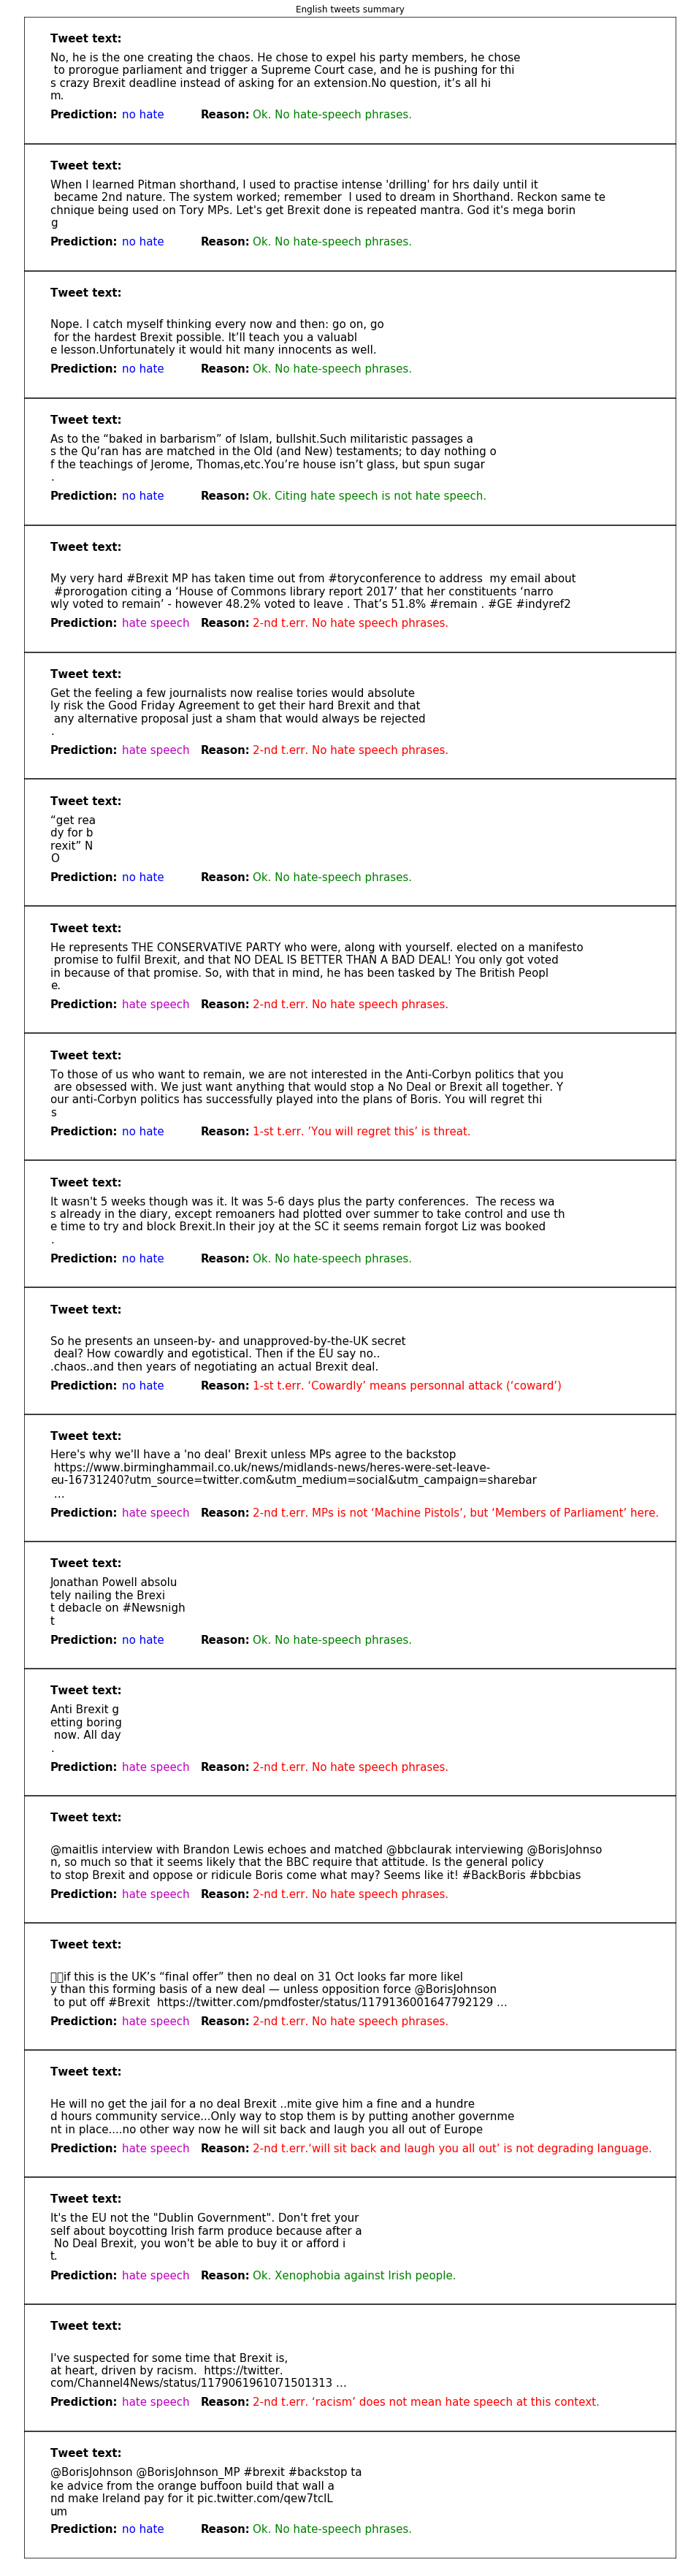

In [19]:
with open('tests/tweets_vis_en.csv', 'r') as f:
    reader = csv.DictReader(f)
    test_cases_en = list(reader)

test_cases_board(test_cases_en, title='English tweets summary', file_name='tests/tweets_summary_en.png')

### Best classifier for PL tweets - LSTM Neural Network

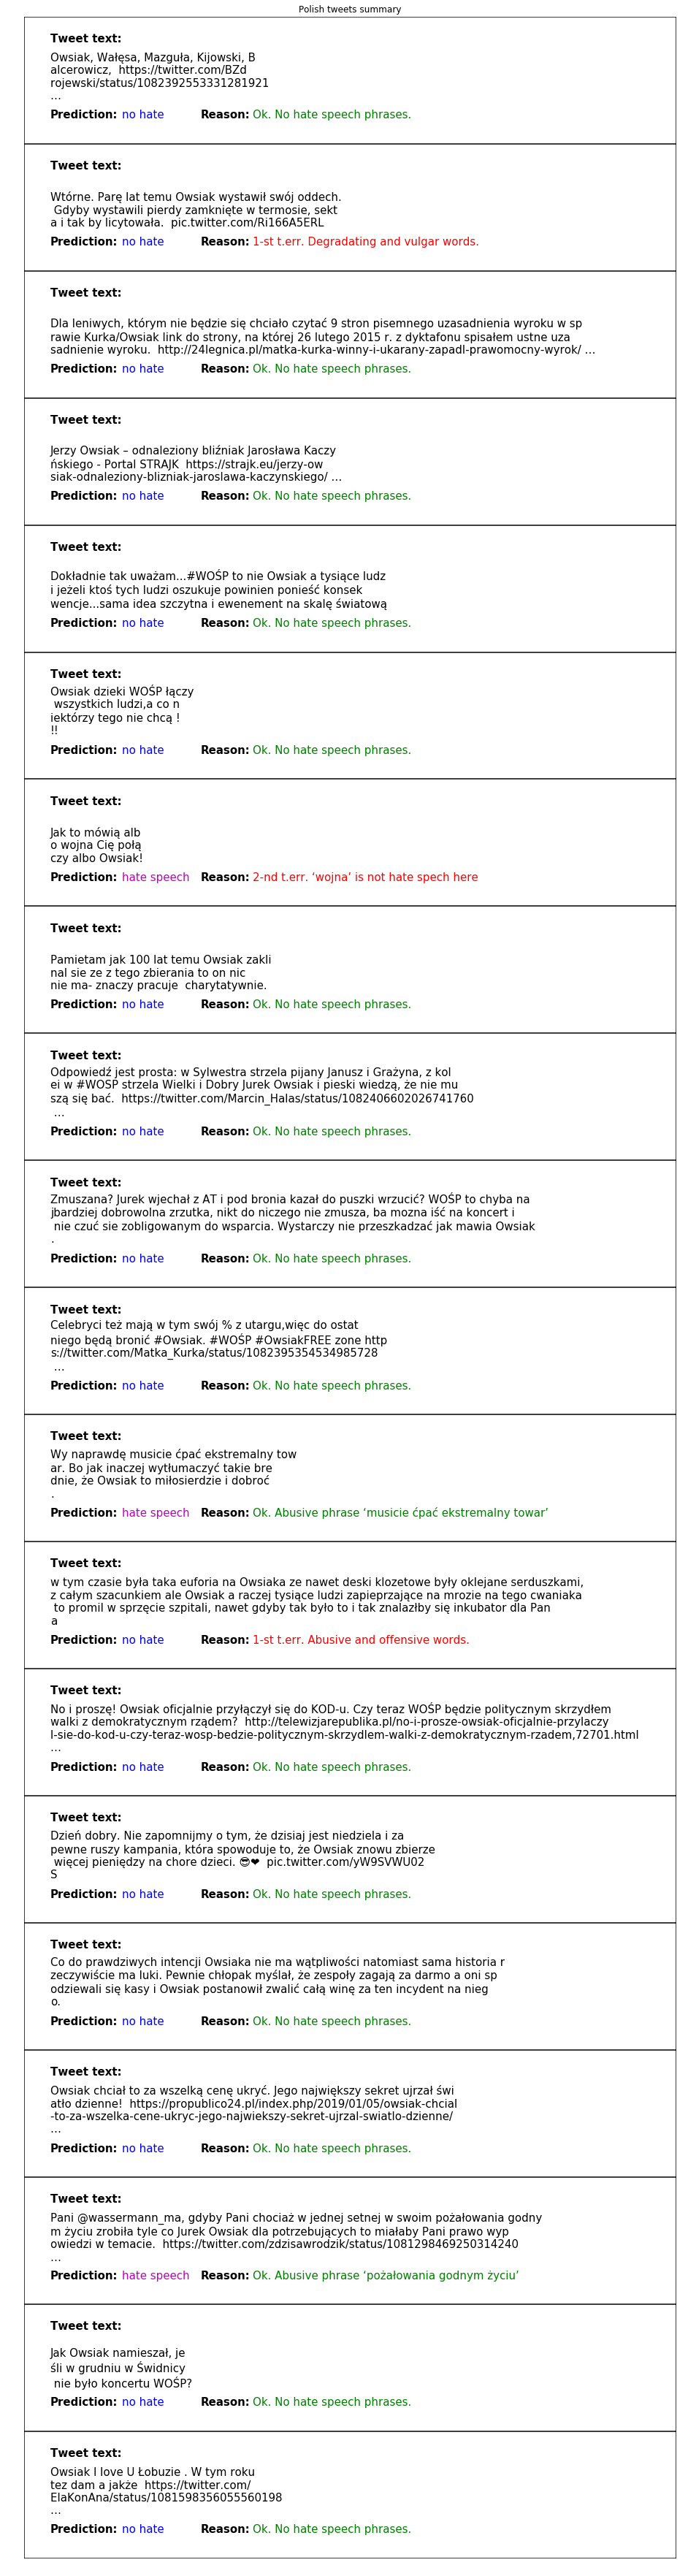

In [20]:
with open('tests/tweets_vis_pl.csv', 'r') as f:
    reader = csv.DictReader(f)
    test_cases_pl = list(reader)

test_cases_board(test_cases_pl, title='Polish tweets summary', file_name='tests/tweets_summary_pl.png')

## Data analyses

In [21]:
# necessary data
with open('tests/necessary_en.csv', 'r') as nec_en_f:
    necessary_en = list(csv.DictReader(nec_en_f))
with open('tests/en_lstm/assigned_labels.csv', 'r') as labels_en_f:
    labels_en =  list(csv.DictReader(labels_en_f))

with open('tests/necessary_pl.csv', 'r') as nec_pl_f:
    necessary_pl = list(csv.DictReader(nec_pl_f))
with open('tests/pl_lstm/assigned_labels.csv', 'r') as labels_pl_f:
    labels_pl =  list(csv.DictReader(labels_pl_f))

In [22]:
print('EN data: {}'.format(len(necessary_en)))
print('EN labels: {}'.format(len(labels_en)))
print('PL data: {}'.format(len(necessary_pl)))
print('PL labels: {}'.format(len(labels_pl)))

EN data: 1002136
EN labels: 1002136
PL data: 9518
PL labels: 9518


#### Data analyses to perform:
    1) Which hashtags/mentions denote hate speech or non-hate speech?
    2) Which users (username, name) from test data use hate speech?
    3) How do the hour/day-of-month histograms for all, hate-speech and non-hate-speech tweets look like?
    4) How the tweets denoted as hate speech are popular (number of likes retweets, replies) according to above analysis?

### Hashtags, mentions and users

In [23]:
def frequencies(data, labels, elements='hashtags'):
    if elements not in ['hashtags', 'mentions', 'name', 'username']:
        raise ValueError('Unknown elements: {}. Must be: [hashtags, mentions, name, username]'.format(elements))
    
    elements_dict = {'0': {}, '1': {}}
    def insert_element(el_dict, el, ll):
        '''helper function: el_dict - elements dictionary, el - element, ll - label'''
        if el not in el_dict[ll]:
            el_dict[ll][el] = 0
        el_dict[ll][el] += 1
    
    for d, l in zip(data, labels):
        element = d[elements]
        if element == '[]' or (element.startswith('[\'') and element.endswith('\']')):  # list detection
            element = json.loads(d[elements].replace('\'', '\"'))
            for elem in element:
                insert_element(elements_dict, elem, l['Label'])
        else:
            insert_element(elements_dict, element, l['Label'])
    
    return elements_dict['1'], elements_dict['0']

def most_frequent(freq_dict, count=20, threshold=2):
    freq_dict = dict(filter(lambda x: x[1]>=threshold, freq_dict.items()))
    most_freq = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:count]
    
    return most_freq

def common_indices(tset1, tset2):
    '''gives common indices from tuples set 1 (tset1) which names appeared in tset2'''
    indices = []
    tset2_names = [t[0] for t in tset2]
    for t in tset1:
        indices.append(1 if t[0] in tset2_names else 0)
    
    return indices

In [24]:
def frequencies_bars(h_tuples, nh_tuples, title, subtitle, elements, ortho=False, save_file=None):
    fig, axs = plt.subplots(1, 2, figsize=(16, 4))
    
    if elements not in ['hashtags', 'mentions', 'names', 'usernames']:
        raise ValueError('Unknown elements: {}. Must be: [hashtags, mentions, names, usernames]'.format(elements))
    
    def set_bar_labels(axis, bars, ind):
        for bar, i in zip(bars, ind):
            h = bar.get_height()
            w = bar.get_width()
            x_c = bar.get_x()
            h_s = '{}*'.format(h) if i==1 else h
            wht = 'bold' if i==1 else 'normal'
            rot = 90 if ortho else 0
            axis.annotate(h_s, xy=(x_c + w/2, h), xytext=(0, 4),
                          textcoords='offset points', size=10, ha='center', va='bottom',
                          fontweight=wht, rotation=rot)
    
    try:
        h_labels = [u'{}'.format(t[0]) for t in h_tuples]
    except UnicodeDecodeError:
        h_labels = []
        for t in h_tuples:
            try:
                h_labels.append(u'{}'.format(t[0].decode('utf-8')))
            except UnicodeEncodeError:
                h_labels.append('uc_error')
    
    h_y = [t[1] for t in h_tuples]
    max_hy = np.max(h_y)
    h_x = range(len(h_labels))
    h_c_ind = common_indices(h_tuples, nh_tuples)
    
    try:
        nh_labels = [u'{}'.format(t[0]) for t in nh_tuples]
    except UnicodeDecodeError:
        nh_labels = []
        for t in nh_tuples:
            try:
                nh_labels.append(u'{}'.format(t[0].decode('utf-8')))
            except UnicodeEncodeError:
                nh_labels.append('uc_error')  
    
    nh_y = [t[1] for t in nh_tuples]
    max_nhy = np.max(nh_y)
    nh_x = range(len(nh_labels))
    nh_c_ind = common_indices(nh_tuples, h_tuples)
    
    bars0 = axs[0].bar(h_x, h_y, color='m')
    axs[0].set_xlabel(elements.capitalize())
    axs[0].set_ylabel('Frequency')
    axs[0].set_xticks(h_x)
    axs[0].set_xticklabels(h_labels, rotation='90')
    axs[0].set_ylim([0, 1.1*max_hy])
    axs[0].set_title('{} hate-speech {}'
                     .format('{} most freq.'.format(len(h_labels)) if len(h_labels) == 20 else 'All',
                             elements))
    set_bar_labels(axs[0], bars0, h_c_ind)
    axs[0].annotate('X* - appears also\nin non-hate speech', xy=(0.7, 0.85),
                    xycoords='axes fraction', fontweight='bold')
    
    bars1 = axs[1].bar(nh_x, nh_y, color='b')
    axs[1].set_xlabel(elements.capitalize())
    axs[1].set_ylabel('Frequency')
    axs[1].set_xticks(nh_x)
    axs[1].set_xticklabels(nh_labels, rotation='90')
    axs[1].set_ylim([0, 1.1*max_nhy])
    axs[1].set_title('{} non-hate-speech {}'
                     .format('{} most freq.'.format(len(nh_labels)) if len(nh_labels) == 20 else 'All',
                             elements))
    set_bar_labels(axs[1], bars1, nh_c_ind)
    axs[1].annotate('X* - appears also\nin hate speech', xy=(0.7, 0.85),
                    xycoords='axes fraction', fontweight='bold')
    
    plt.text(x=0.5, y=0.94, s=title, fontsize=18, ha='center', transform=fig.transFigure)
    plt.text(x=0.5, y=0.88, s= subtitle, fontsize=12, ha='center', transform=fig.transFigure)
    
    plt.subplots_adjust(top=0.8, wspace=0.3)
    
    if save_file:
        plt.savefig(save_file)
    plt.show()

In [25]:
h_hts_en, nh_hts_en = frequencies(necessary_en, labels_en, elements='hashtags')
h_mts_en, nh_mts_en = frequencies(necessary_en, labels_en, elements='mentions')
h_nm_en, nh_nm_en = frequencies(necessary_en, labels_en, elements='name')
h_unm_en, nh_unm_en = frequencies(necessary_en, labels_en, elements='username')

h_hts_pl, nh_hts_pl = frequencies(necessary_pl, labels_pl, elements='hashtags')
h_mts_pl, nh_mts_pl = frequencies(necessary_pl, labels_pl, elements='mentions')
h_nm_pl, nh_nm_pl = frequencies(necessary_pl, labels_pl, elements='name')
h_unm_pl, nh_unm_pl = frequencies(necessary_pl, labels_pl, elements='username')

#### English tweets

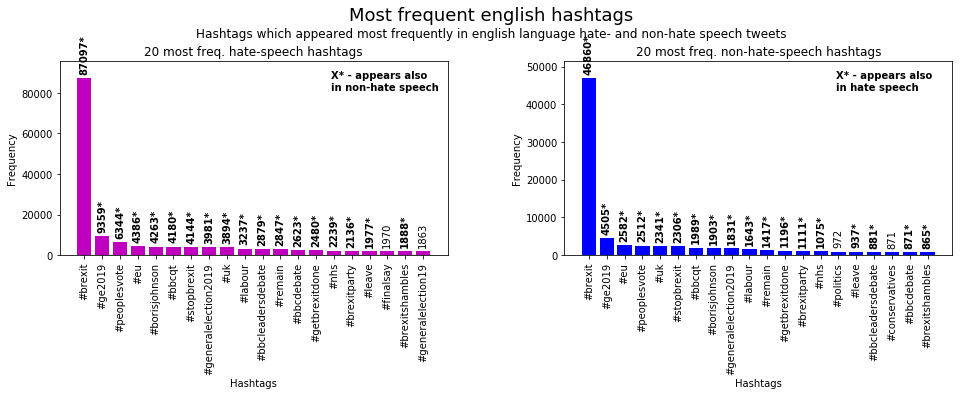

In [26]:
frequencies_bars(most_frequent(h_hts_en), most_frequent(nh_hts_en),
                 title='Most frequent english hashtags',
                 subtitle='Hashtags which appeared most frequently in english language hate- and non-hate speech tweets',
                 elements='hashtags', ortho=True, save_file='tests/analysis_hts_en.png')

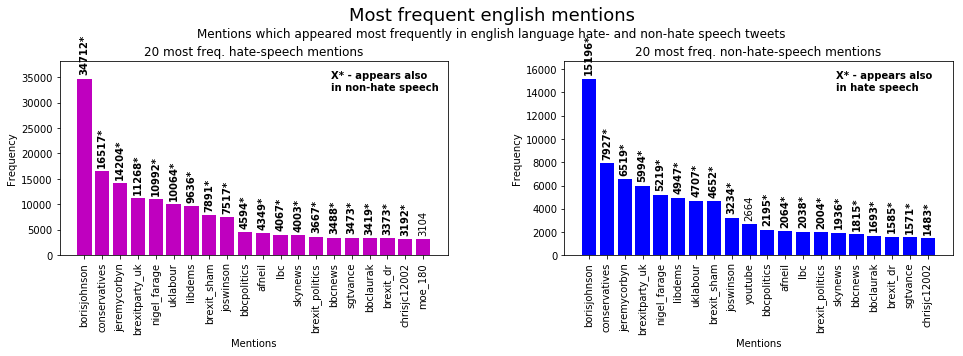

In [27]:
frequencies_bars(most_frequent(h_mts_en), most_frequent(nh_mts_en),
                 title='Most frequent english mentions',
                 subtitle='Mentions which appeared most frequently in english language hate- and non-hate speech tweets',
                 elements='mentions', ortho=True, save_file='tests/analysis_mts_en.png')

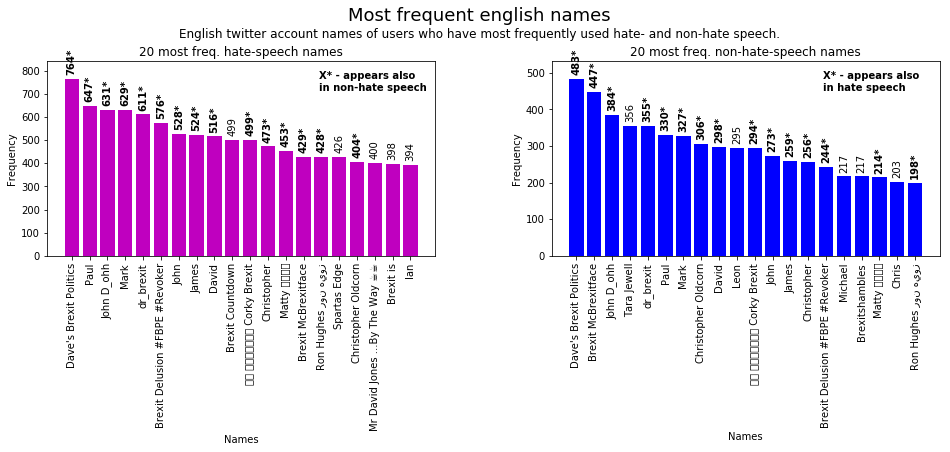

In [28]:
frequencies_bars(most_frequent(h_nm_en), most_frequent(nh_nm_en),
                 title='Most frequent english names',
                 subtitle='English twitter account names of users who have most frequently used hate- and non-hate speech.',
                 elements='names', ortho=True, save_file='tests/analysis_nm_en.png')

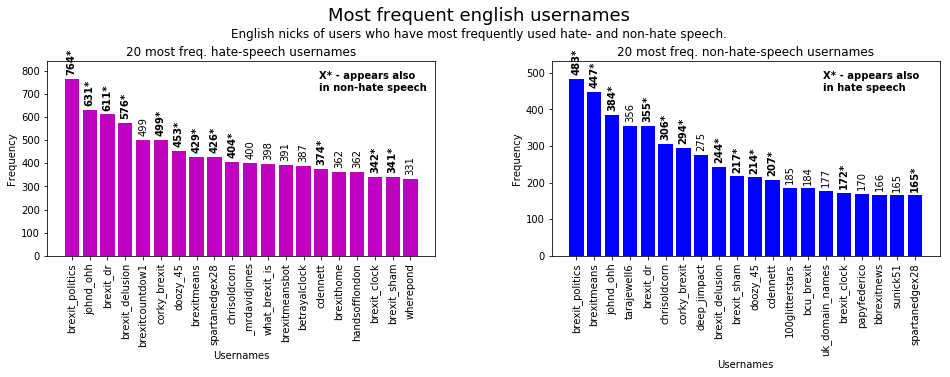

In [29]:
frequencies_bars(most_frequent(h_unm_en), most_frequent(nh_unm_en),
                 title='Most frequent english usernames',
                 subtitle='English nicks of users who have most frequently used hate- and non-hate speech.',
                 elements='usernames', ortho=True, save_file='tests/analysis_unm_en.png')

#### Polish tweets

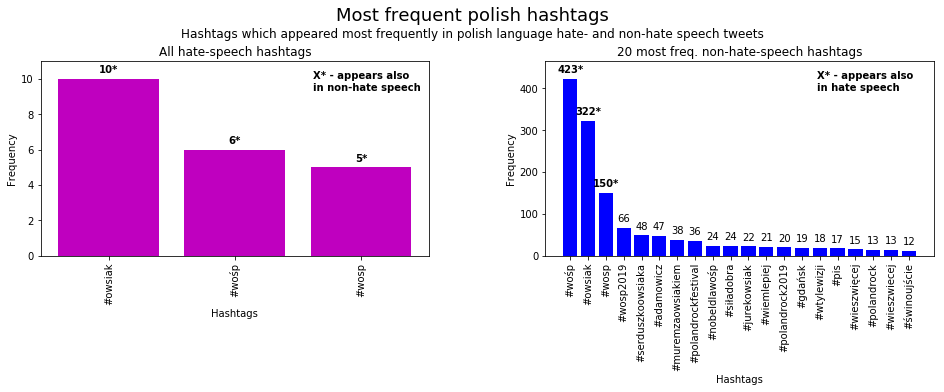

In [30]:
frequencies_bars(most_frequent(h_hts_pl), most_frequent(nh_hts_pl),
                 title='Most frequent polish hashtags',
                 subtitle='Hashtags which appeared most frequently in polish language hate- and non-hate speech tweets',
                 elements='hashtags', save_file='tests/analysis_hts_pl.png')

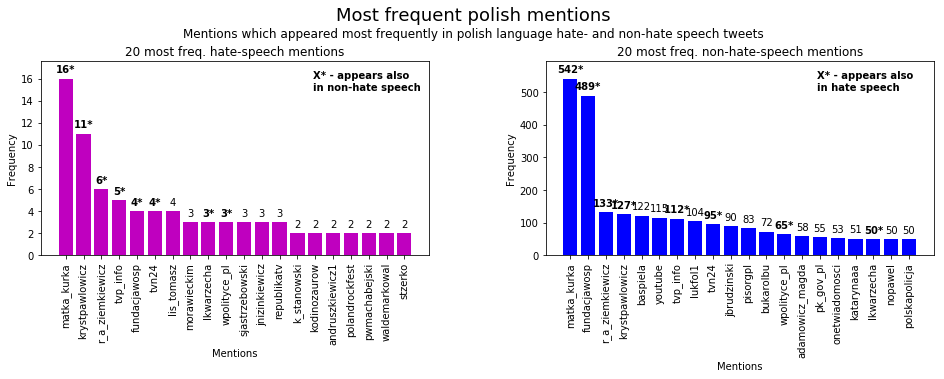

In [31]:
frequencies_bars(most_frequent(h_mts_pl), most_frequent(nh_mts_pl),
                 title='Most frequent polish mentions',
                 subtitle='Mentions which appeared most frequently in polish language hate- and non-hate speech tweets',
                 elements='mentions', save_file='tests/analysis_mts_pl.png')

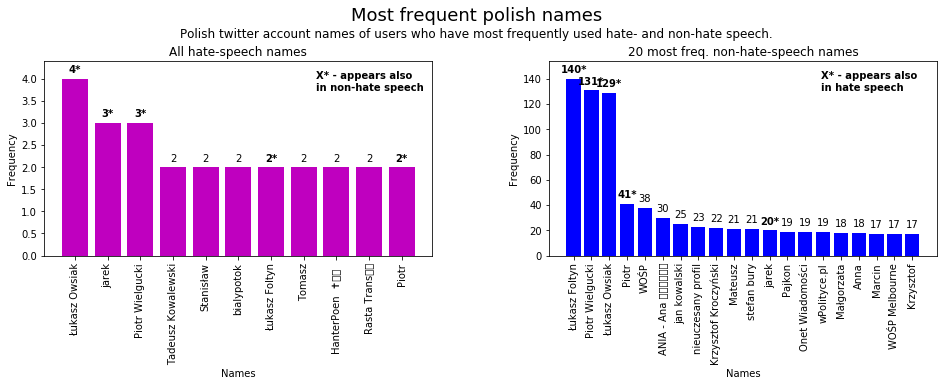

In [32]:
frequencies_bars(most_frequent(h_nm_pl), most_frequent(nh_nm_pl),
                 title='Most frequent polish names',
                 subtitle='Polish twitter account names of users who have most frequently used hate- and non-hate speech.',
                 elements='names', save_file='tests/analysis_nm_pl.png')

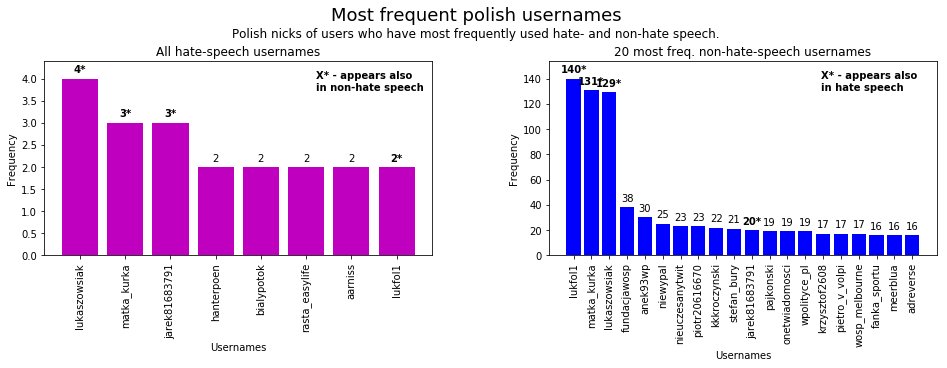

In [33]:
frequencies_bars(most_frequent(h_unm_pl), most_frequent(nh_unm_pl),
                 title='Most frequent polish usernames',
                 subtitle='Polish nicks of users who have most frequently used hate- and non-hate speech.',
                 elements='usernames', save_file='tests/analysis_unm_pl.png')

### Hate- & non-hate tweets distributions (month of year; day of week; hour of day)

In [34]:
def reduce_to_full_hour_days(data, min_hour=0):
    def daterange(start, end):
        for n in range(int((end-start).days)):
            yield start + timedelta(n)
    
    reduced = []
    n_dates = 0
    for dat in daterange(date(2018, 10, 1), date(2019, 12, 31)):
        n_dates += 1
    
    t = tqdm(daterange(date(2018, 10, 1), date(2019, 12, 31)), total=n_dates)
    for dat in t:
        t.set_postfix_str('Reduction to full hour days. Date: {} | Total sup.: {}'.format(dat, len(reduced)))
        day_tweets = list(filter(lambda x: x['Day']==dat.day and x['Month']==dat.month and x['Year']==dat.year , data))
        hrs = set([dt['Hour'] for dt in day_tweets])
        pred = lambda x: x <= min_hour
        if any(pred(h) for h in hrs): 
            reduced.extend(day_tweets)
    
    return reduced

def get_datehour_and_pop_components(data):
    datehours = []
    
    t = tqdm(data)
    t.set_postfix_str('Dates & hours extraction.')
    for d in t:
        dt = datetime.strptime(d['date'] + ' ' + d['time'], '%Y-%m-%d %H:%M:%S')
        datehours.append({
            'Datetime': dt,
            'Year': dt.year,
            'Month': dt.month,
            'Day': dt.day,
            'WeekDay': dt.weekday()-1,
            'Hour': dt.hour,
            'Retweets': int(d['retweets_count']),
            'Likes': int(d['likes_count']),
            'Replies': d['reply_to'].count('{')
        })
    
    return datehours

In [35]:
datehours_en = get_datehour_and_pop_components(necessary_en)
red_datehours_en = reduce_to_full_hour_days(datehours_en, min_hour=3)

datehours_pl = get_datehour_and_pop_components(necessary_pl)

In [36]:
monthdays_en = [dh['Day'] for dh in datehours_en]
weekdays_en = [dh['WeekDay'] for dh in datehours_en]
dayhours_en = [dh['Hour'] for dh in red_datehours_en]

monthdays_pl = [dh['Day'] for dh in datehours_pl]
weekdays_pl = [dh['WeekDay'] for dh in datehours_pl]
dayhours_pl = [dh['Hour'] for dh in datehours_pl]

In [37]:
def tweets_distribution(data, labels, title, subtitle, data_type, save_file=None):
    fig, axs = plt.subplots(1, 2, figsize=(16, 4))
    
    if data_type not in ['monthdays', 'weekdays', 'dayhours']:
        raise ValueError('Unknown elements: {}. Must be: [monthdays, weekdays, dayhours]'.format(elements))
    
    adv = 'month-daily' if data_type == 'monthdays' else 'week-daily' if data_type == 'weekdays' else 'day-hourly'
    
    h_data, nh_data = [], []
    for d, l in zip(data, labels):
        if l['Label'] == '1':
            h_data.append(d)
        else:
            nh_data.append(d)
    
    labels = range(1, 32) if data_type == 'monthdays'\
                          else ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']\
                          if data_type == 'weekdays' else range(24)
    x = range(len(labels))
    h_y, nh_y = [0]*len(x), [0]*len(x)
    
    for h_d in h_data:
        h_y[h_d-1] += 1
    for nh_d in nh_data:
        nh_y[nh_d-1] += 1
    
    axs[0].bar(x, h_y, color='m')
    axs[0].set_xlabel('Hate-speech tweets')
    axs[0].set_ylabel('Cardinality')
    axs[0].set_title('Hate-speech tweets {} distribution'.format(adv))
    axs[0].set_xticks(x)
    axs[0].set_xticklabels(labels)
    
    axs[1].bar(x, nh_y, color='b')
    axs[1].set_xlabel('Non-hate-speech tweets')
    axs[1].set_ylabel('Cardinality')
    axs[1].set_title('Non-hate-speech tweets {} distribution'.format(adv))
    axs[1].set_xticks(x)
    axs[1].set_xticklabels(labels)
    
    plt.text(x=0.5, y=0.94, s=title, fontsize=18, ha='center', transform=fig.transFigure)
    plt.text(x=0.5, y=0.88, s= subtitle, fontsize=12, ha='center', transform=fig.transFigure)
    
    plt.subplots_adjust(top=0.8, wspace=0.3)
    
    if save_file:
        plt.savefig(save_file)
    plt.show()

#### English tweets

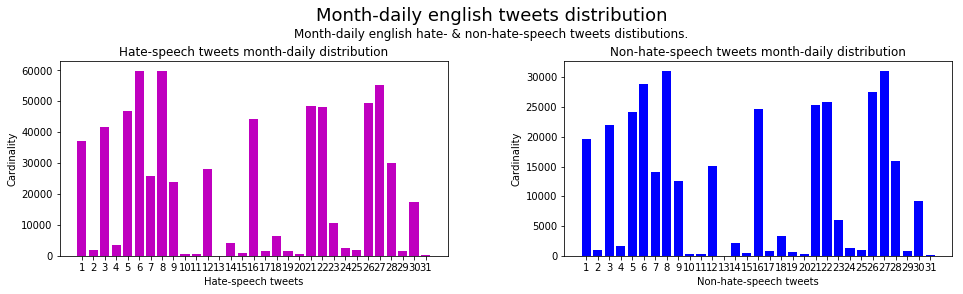

In [38]:
tweets_distribution(monthdays_en, labels_en,
                    title='Month-daily english tweets distribution',
                    subtitle='Month-daily english hate- & non-hate-speech tweets distibutions.',
                    data_type='monthdays', save_file='tests/md_distr_en.png')

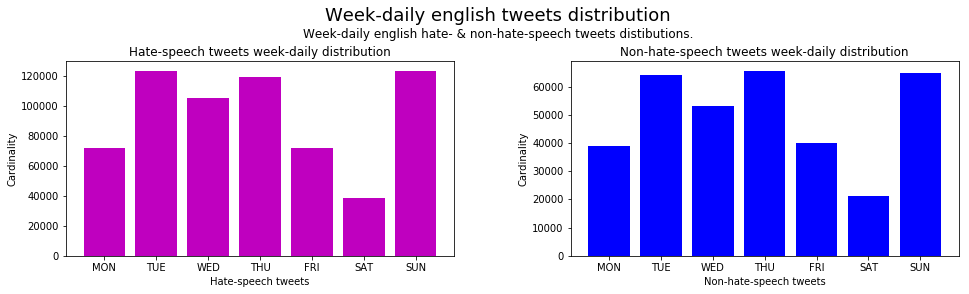

In [39]:
tweets_distribution(weekdays_en, labels_en,
                    title='Week-daily english tweets distribution',
                    subtitle='Week-daily english hate- & non-hate-speech tweets distibutions.',
                    data_type='weekdays', save_file='tests/wd_distr_en.png')

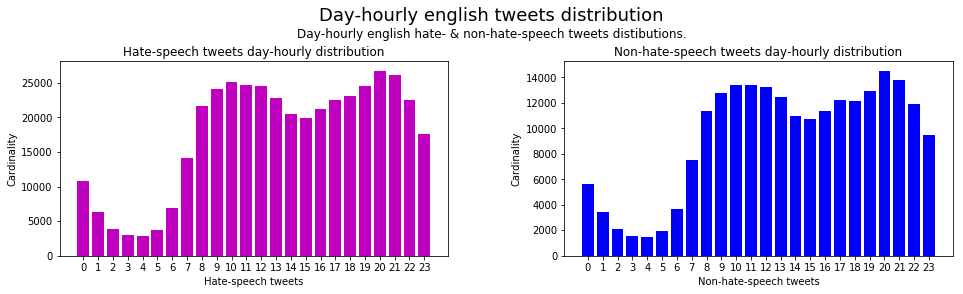

In [40]:
tweets_distribution(dayhours_en, labels_en,
                    title='Day-hourly english tweets distribution',
                    subtitle='Day-hourly english hate- & non-hate-speech tweets distibutions.',
                    data_type='dayhours', save_file='tests/dh_distr_en.png')

#### Polish tweets

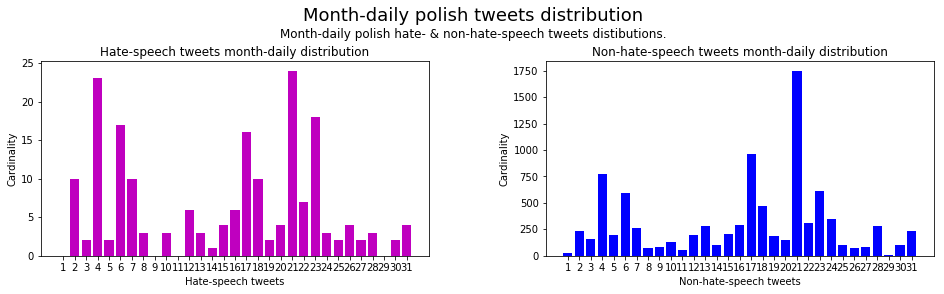

In [41]:
tweets_distribution(monthdays_pl, labels_pl,
                    title='Month-daily polish tweets distribution',
                    subtitle='Month-daily polish hate- & non-hate-speech tweets distibutions.',
                    data_type='monthdays', save_file='tests/md_distr_pl.png')

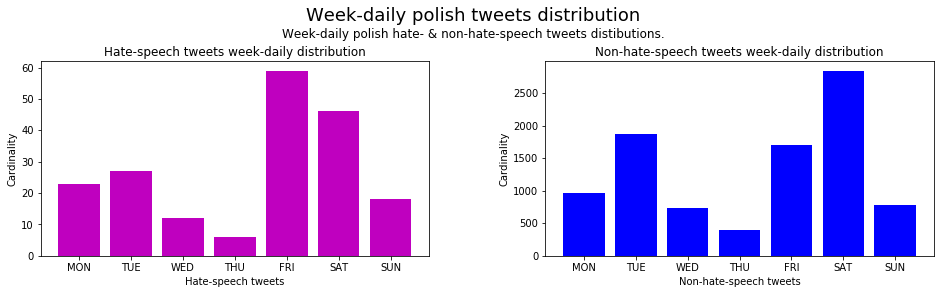

In [42]:
tweets_distribution(weekdays_pl, labels_pl,
                    title='Week-daily polish tweets distribution',
                    subtitle='Week-daily polish hate- & non-hate-speech tweets distibutions.',
                    data_type='weekdays', save_file='tests/wd_distr_pl.png')

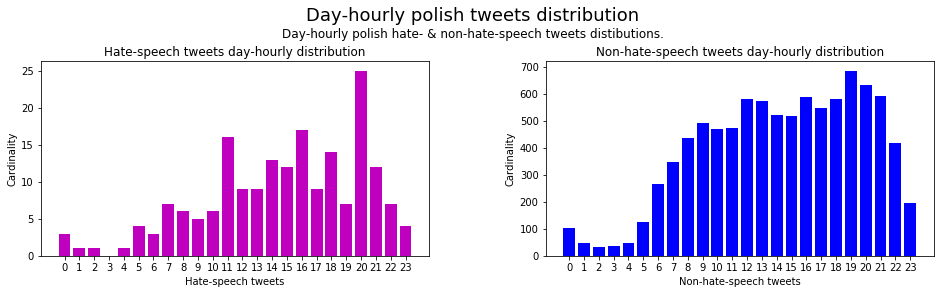

In [43]:
tweets_distribution(dayhours_pl, labels_pl,
                    title='Day-hourly polish tweets distribution',
                    subtitle='Day-hourly polish hate- & non-hate-speech tweets distibutions.',
                    data_type='dayhours', save_file='tests/dh_distr_pl.png')

### Hate- & non-hate speech tweets popularity (likes, retweets, replies)

In [44]:
monthdays_pop_en = [{'TimeUnit': dh['Day'], 'Retweets': dh['Retweets'], 'Likes': dh['Likes'], 'Replies': dh['Replies']} for dh in datehours_en]
weekdays_pop_en = [{'TimeUnit': dh['WeekDay'], 'Retweets': dh['Retweets'], 'Likes': dh['Likes'], 'Replies': dh['Replies']} for dh in datehours_en]
dayhours_pop_en = [{'TimeUnit': dh['Hour'], 'Retweets': dh['Retweets'], 'Likes': dh['Likes'], 'Replies': dh['Replies']} for dh in red_datehours_en]

monthdays_pop_pl = [{'TimeUnit': dh['Day'], 'Retweets': dh['Retweets'], 'Likes': dh['Likes'], 'Replies': dh['Replies']} for dh in datehours_pl]
weekdays_pop_pl = [{'TimeUnit': dh['WeekDay'], 'Retweets': dh['Retweets'], 'Likes': dh['Likes'], 'Replies': dh['Replies']} for dh in datehours_pl]
dayhours_pop_pl = [{'TimeUnit': dh['Hour'], 'Retweets': dh['Retweets'], 'Likes': dh['Likes'], 'Replies': dh['Replies']} for dh in datehours_pl]

In [45]:
def tweets_popularity_distribution(data, labels, title, subtitle, data_type, save_file=None):
    fig, axs = plt.subplots(3, 2, figsize=(16, 16))
    
    if data_type not in ['monthdays', 'weekdays', 'dayhours']:
        raise ValueError('Unknown elements: {}. Must be: [monthdays, weekdays, dayhours]'.format(elements))
    
    adv = 'month-daily' if data_type == 'monthdays' else 'week-daily' if data_type == 'weekdays' else 'day-hourly'
    
    h_data, nh_data = [], []
    for d, l in zip(data, labels):
        if l['Label'] == '1':
            h_data.append(d)
        else:
            nh_data.append(d)
    
    labels = range(1, 32) if data_type == 'monthdays'\
                          else ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']\
                          if data_type == 'weekdays' else range(24)
    x = range(len(labels))
    h_ret_y, nh_ret_y = [0]*len(x), [0]*len(x)  # retweets
    h_lik_y, nh_lik_y = [0]*len(x), [0]*len(x)  # likes
    h_rep_y, nh_rep_y = [0]*len(x), [0]*len(x)  # replies
    
    for (h_m, nh_m, m) in [(h_ret_y, nh_ret_y, 'Retweets'), (h_lik_y, nh_lik_y, 'Likes'), (h_rep_y, nh_rep_y, 'Replies')]:
        for h_d in h_data:
            h_m[h_d['TimeUnit']-1] += h_d[m]
        for nh_d in nh_data:
            nh_m[nh_d['TimeUnit']-1] += nh_d[m]
    
    for (i, h_m, nh_m, m) in [(0, h_ret_y, nh_ret_y, 'retweets'),
                              (1, h_lik_y, nh_lik_y, 'likes'),
                              (2, h_rep_y, nh_rep_y, 'replies')]:
        for (j, _m, _type, c) in [(0, h_m, 'Hate', 'm'),
                                  (1, nh_m, 'Non-hate', 'b')]:
            axs[i][j].bar(x, _m, color=c)
            axs[i][j].set_xlabel('{}-speech {}'.format(_type, m))
            axs[i][j].set_ylabel('Cardinality')
            axs[i][j].set_title('{}-speech {} {} distribution'.format(_type, m, adv))
            axs[i][j].set_xticks(x)
            axs[i][j].set_xticklabels(labels)
            
            mx, a_mx = np.max(_m), np.argmax(_m)
            avg = np.mean(_m)
            med = np.median(_m)
            axs[i][j].scatter([a_mx], [mx], label='Max: {}'.format(mx), zorder=10, marker='v', color='k', s=100)
            axs[i][j].plot([0, x[-1]], [avg, avg], label='Average: {}'.format(int(avg)), color='r')
            axs[i][j].plot([0, x[-1]], [med, med], label='Median: {}'.format(int(med)), color='g')
            axs[i][j].legend(loc='best')
    
    plt.text(x=0.5, y=0.94, s=title, fontsize=18, ha='center', transform=fig.transFigure)
    plt.text(x=0.5, y=0.92, s= subtitle, fontsize=12, ha='center', transform=fig.transFigure)
    
    if save_file:
        plt.savefig(save_file)
    plt.show()

#### English tweets

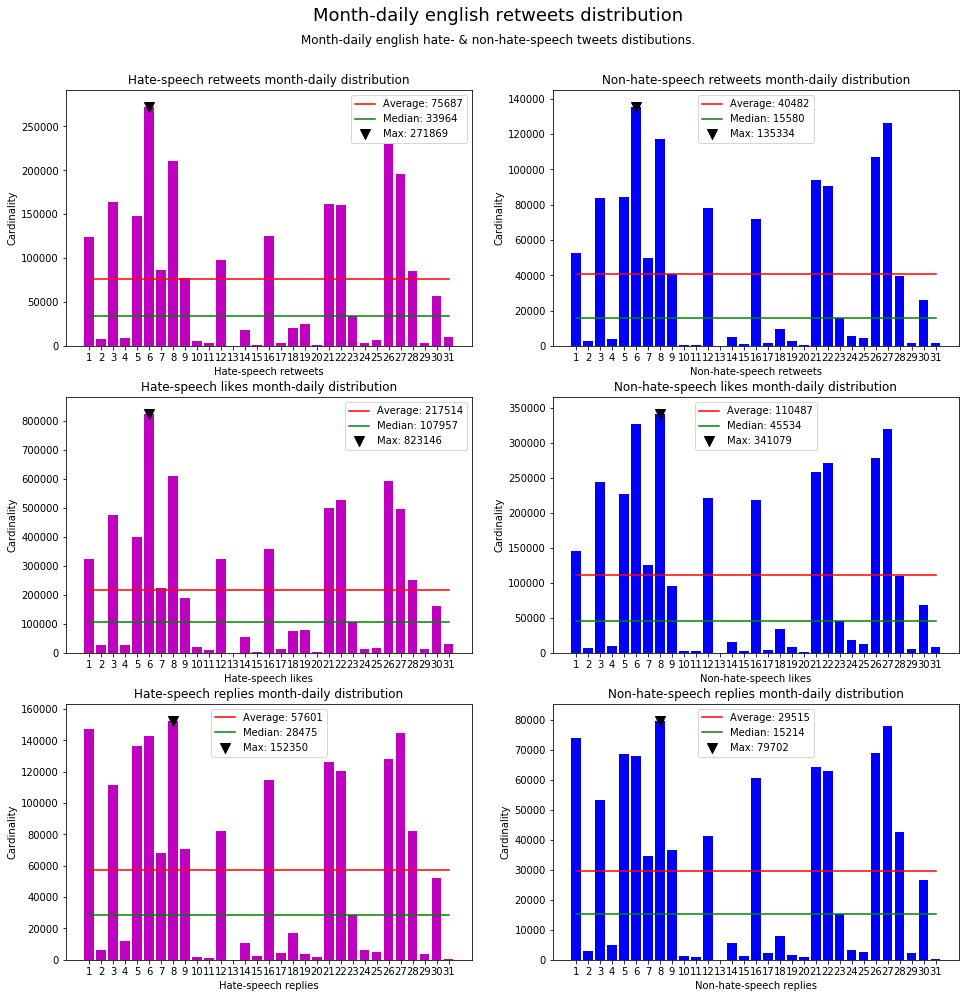

In [46]:
tweets_popularity_distribution(monthdays_pop_en, labels_en,
                               title='Month-daily english retweets distribution',
                               subtitle='Month-daily english hate- & non-hate-speech tweets distibutions.',
                               data_type='monthdays', save_file='tests/md_pop_distr_en.png')

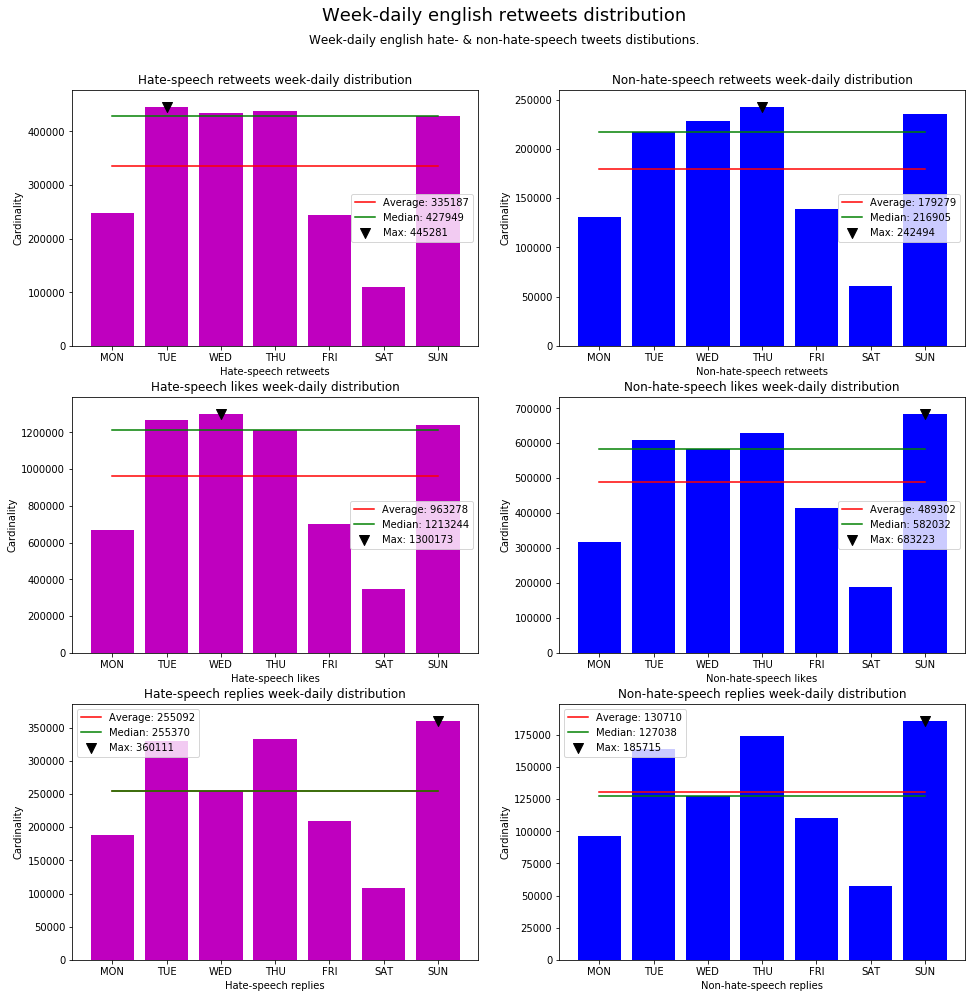

In [47]:
tweets_popularity_distribution(weekdays_pop_en, labels_en,
                               title='Week-daily english retweets distribution',
                               subtitle='Week-daily english hate- & non-hate-speech tweets distibutions.',
                               data_type='weekdays', save_file='tests/wd_pop_distr_en.png')

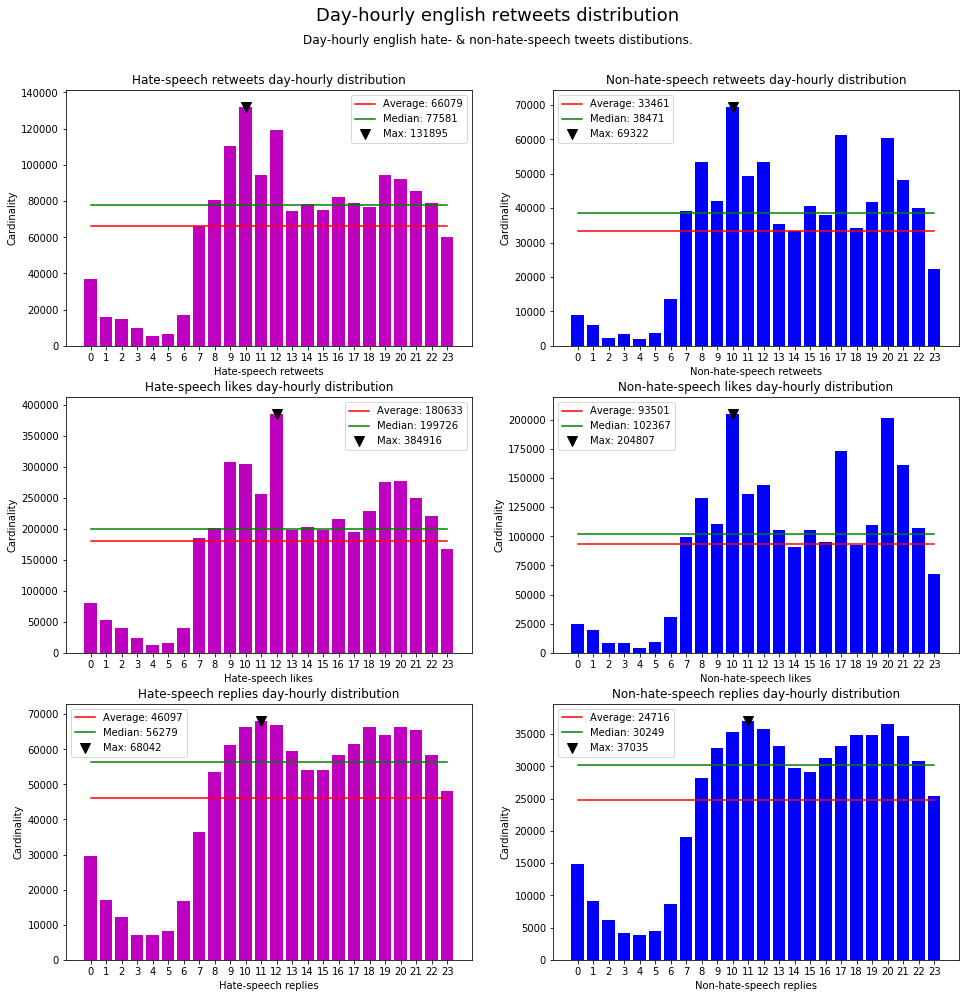

In [48]:
tweets_popularity_distribution(dayhours_pop_en, labels_en,
                               title='Day-hourly english retweets distribution',
                               subtitle='Day-hourly english hate- & non-hate-speech tweets distibutions.',
                               data_type='dayhours', save_file='tests/dh_pop_distr_en.png')

#### Polish tweets

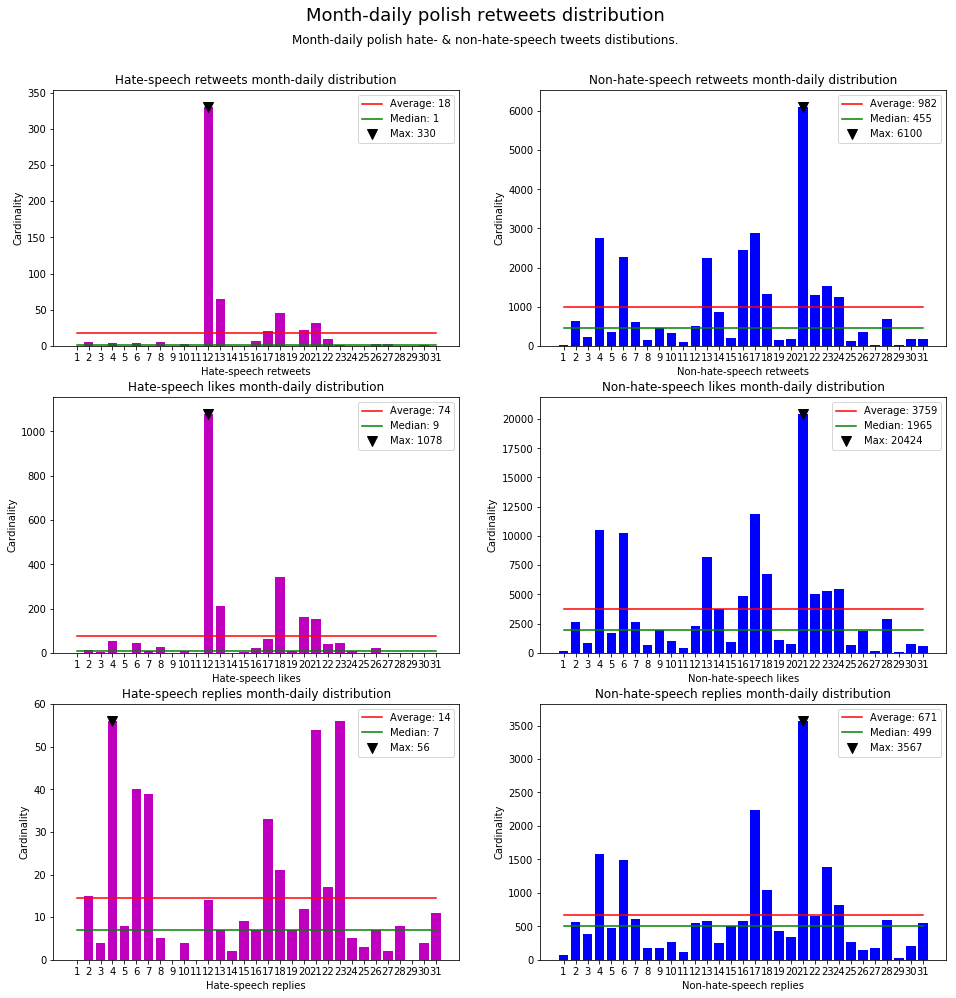

In [49]:
tweets_popularity_distribution(monthdays_pop_pl, labels_pl,
                               title='Month-daily polish retweets distribution',
                               subtitle='Month-daily polish hate- & non-hate-speech tweets distibutions.',
                               data_type='monthdays', save_file='tests/md_pop_distr_pl.png')

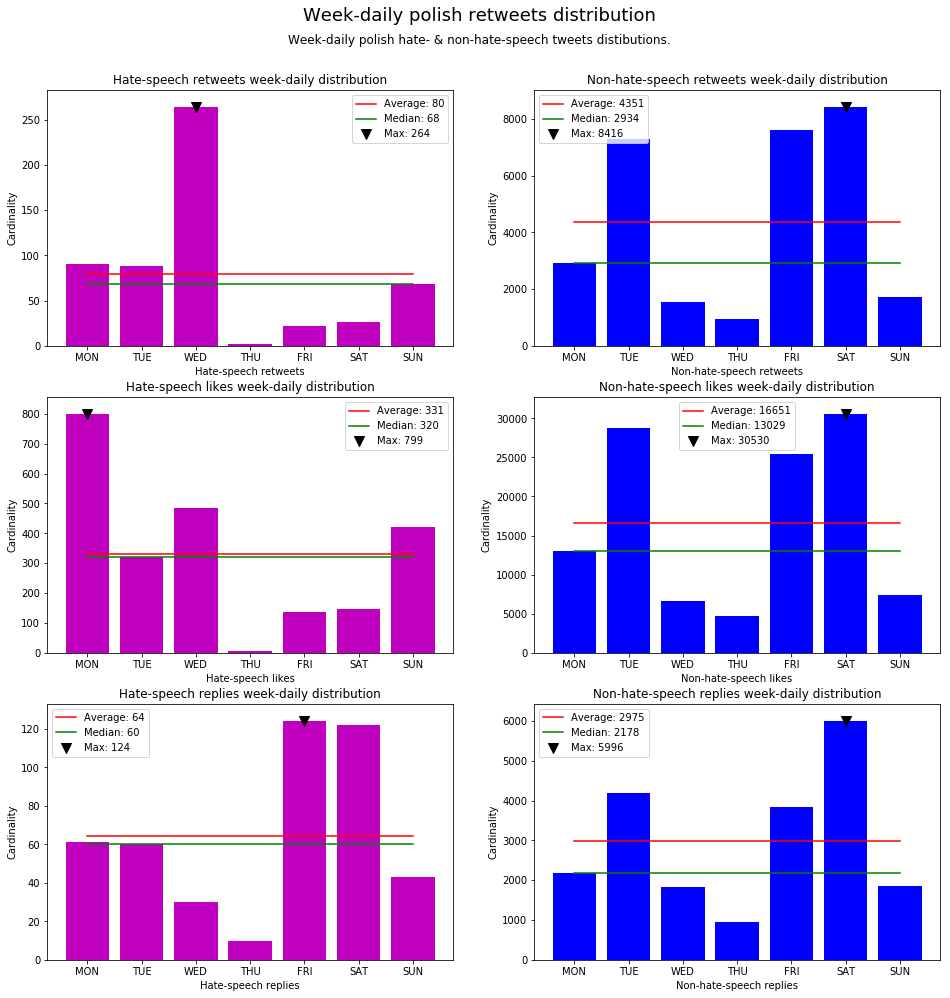

In [50]:
tweets_popularity_distribution(weekdays_pop_pl, labels_pl,
                               title='Week-daily polish retweets distribution',
                               subtitle='Week-daily polish hate- & non-hate-speech tweets distibutions.',
                               data_type='weekdays', save_file='tests/wd_pop_distr_pl.png')

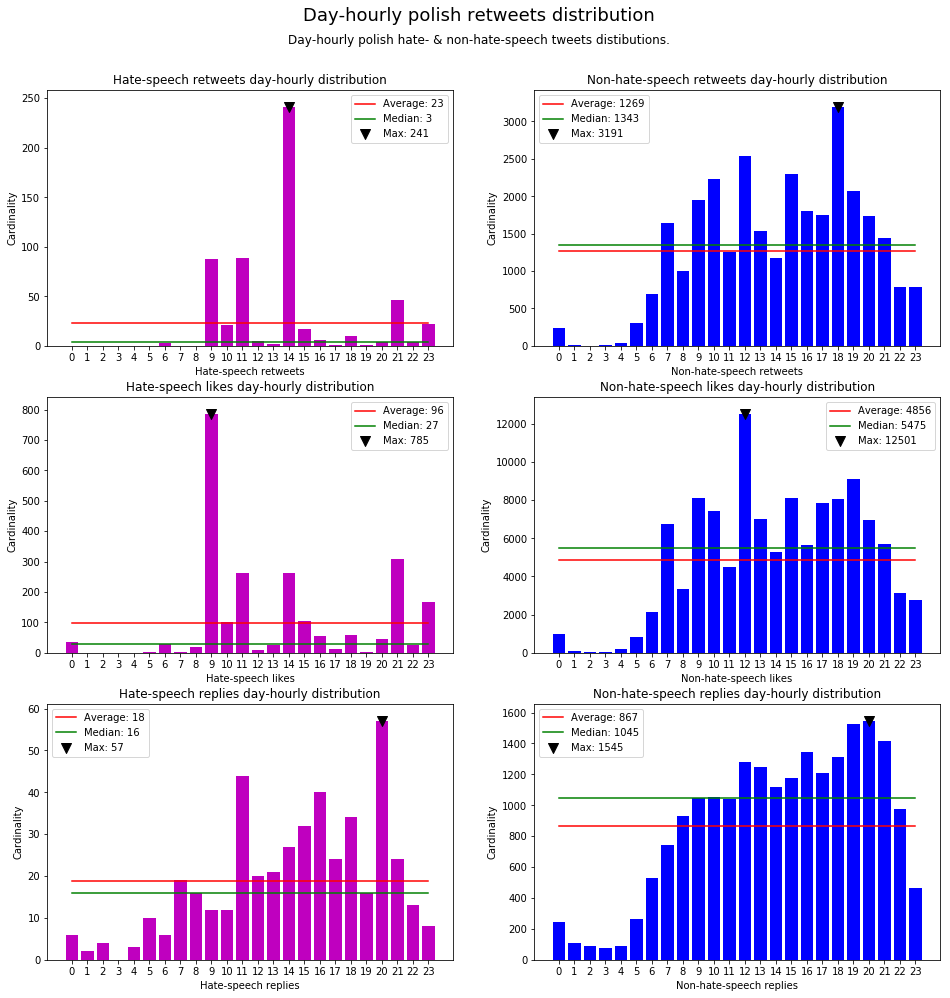

In [51]:
tweets_popularity_distribution(dayhours_pop_pl, labels_pl,
                               title='Day-hourly polish retweets distribution',
                               subtitle='Day-hourly polish hate- & non-hate-speech tweets distibutions.',
                               data_type='dayhours', save_file='tests/dh_pop_distr_pl.png')